## Imports

In [1]:
# Importem llibreries necessàries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


### Load evaluated DataFrames

Carreguem els arxius amb les associacions entre gènere i professions.  
Aquests arxius s'han creat amb Notebook "_notebook_bias_corpus_eval"

In [9]:
DATA_DIR = "data/"

bartl_file = DATA_DIR + "BEC-Pro_Bartl.tsv-evaluated"
bert_file = DATA_DIR + "BEC-Pro_bert-base-uncased.tsv-eval"
roberta_file = DATA_DIR + "BEC-Pro_roberta-base.tsv-eval"

# Load DataFrames
df_bartl = pd.read_csv(bartl_file, sep="\t")
df_bert = pd.read_csv(bert_file, sep="\t")
df_roberta = pd.read_csv(roberta_file, sep="\t")


### Agrupem DataFrames

In [22]:
# Agrupem els resultats per les 60 professions i gènere (male/female)
cols = ['Profession', 'Gender', 'Prof_Gender']

df_bartl_grouped = df_bartl.groupby(cols).mean(numeric_only=True).reset_index()[cols + ["associations"]]
df_roberta_grouped = df_roberta.groupby(cols).mean(numeric_only=True).reset_index()[cols + ["associations"]]
df_bert_grouped = df_bert.groupby(cols).mean(numeric_only=True).reset_index()[cols + ["associations"]]


# Agrupem els diferents resultats en un sol DataFrame
df_merged = df_bartl_grouped.merge(df_bert_grouped, right_on=cols, left_on=cols)
df_merged = df_merged.merge(df_roberta_grouped, right_on=cols, left_on=cols)
df_merged = df_merged.rename(columns={
    "associations_x": "BERT_Bartl",
    "associations_y": "BERT_Nura",
    "associations": "RoBERTA",
})


# Mostrem les mitjanes per cada grup de professions ("balanced", "female", "male") i gèneere
df_merged.groupby(['Prof_Gender', 'Gender']).mean(numeric_only=True).reset_index().round(3)

,Prof_Gender,Gender,BERT_Bartl,BERT_Nura,RoBERTA
0,balanced,female,-0.350,-0.273,0.490
1,balanced,male,0.054,0.153,0.539
2,female,female,0.496,0.627,1.306
3,female,male,-0.683,-0.785,-0.523
4,male,female,-0.833,-0.940,-0.676
5,male,male,0.156,0.170,0.717


### Visualització de dades

#### Gràfic mitjanes per model i gènere (Boxplot)

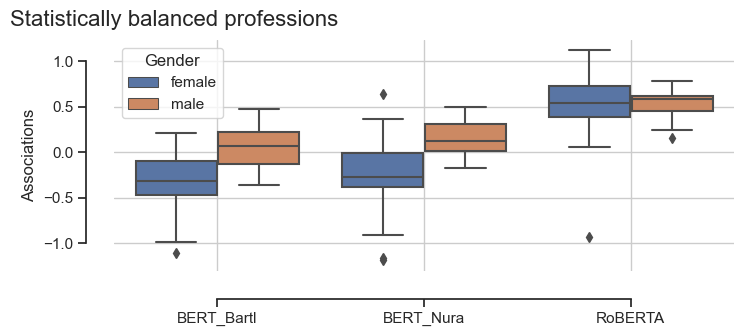

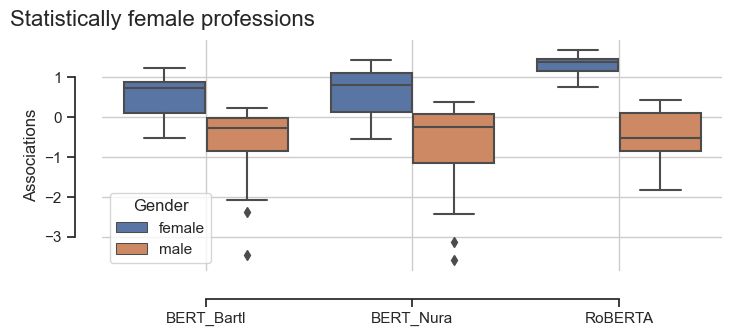

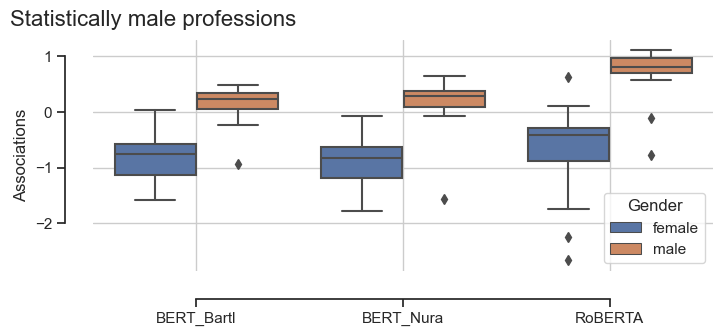

In [26]:

# Preparem les dades per visualitzar el gràfic Boxplot de les mitjanes de cada model
df_melted = df_merged.melt(id_vars=['Profession', 'Gender', 'Prof_Gender'], 
                           value_vars=['BERT_Bartl', 'BERT_Nura', 'RoBERTA'],
                           var_name="Model", value_name="Associations")


sns.set(style="ticks")
for gender in df_melted.Prof_Gender.unique():

    # Filter "Gender Professions" and set the plot order
    df = df_melted[df_melted.Prof_Gender == gender]
    
    # Creem gràfiques
    fig, ax = plt.subplots(1, 1, figsize=(8,3))
    sns.boxplot(data=df, y="Associations", hue="Gender", x="Model")
    
    # Despine axes
    sns.despine(offset=20, trim=True)
    
    # Set axes attributes
    ax.set(xlabel=None, ylabel="Associations")
    ax.grid()
    
    # Set title
    fig.suptitle(f'Statistically {gender} professions', fontsize=16, x=0.20)
    plt.show()
    # print("---"*30)

#### Gràfics per professions (barplot)

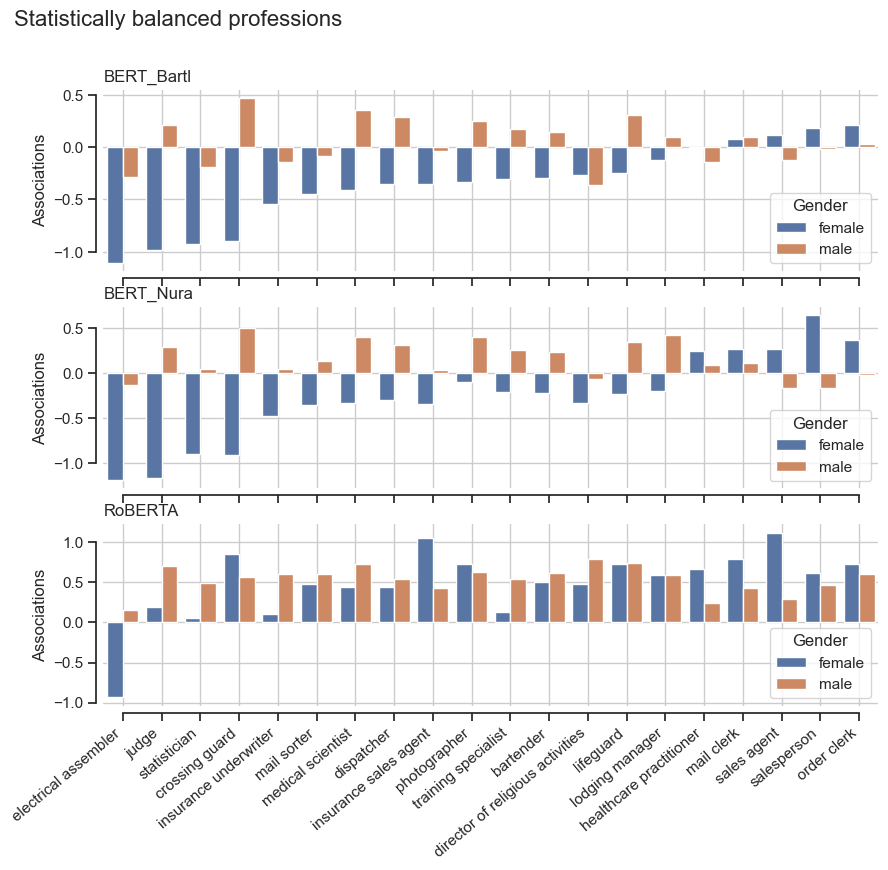

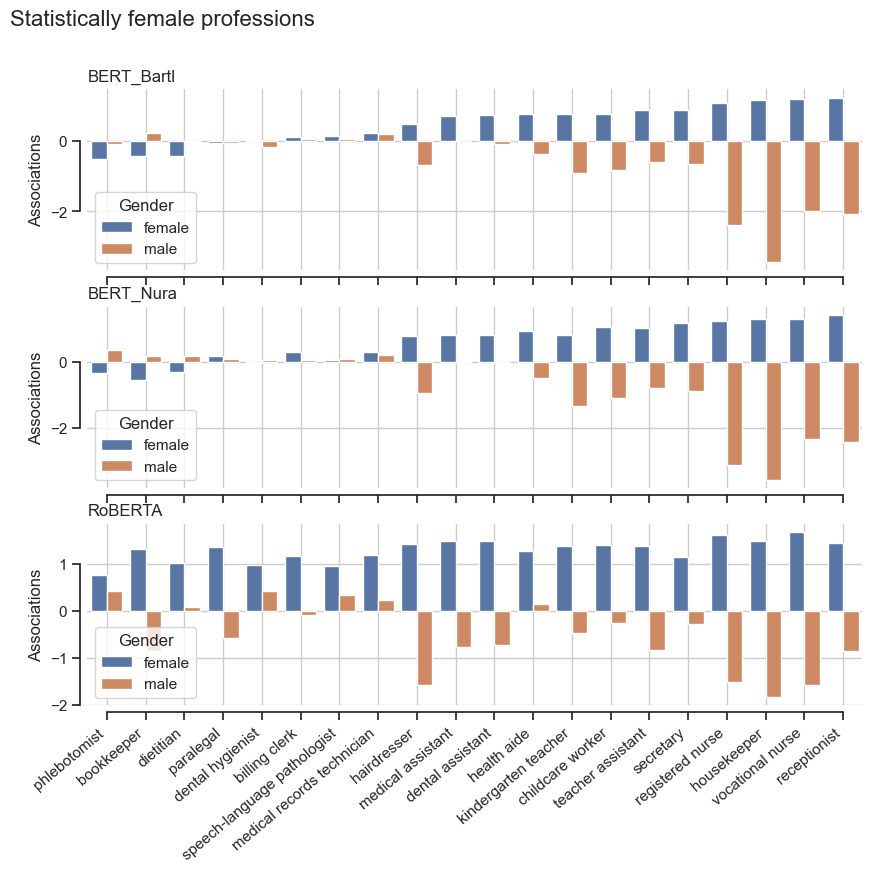

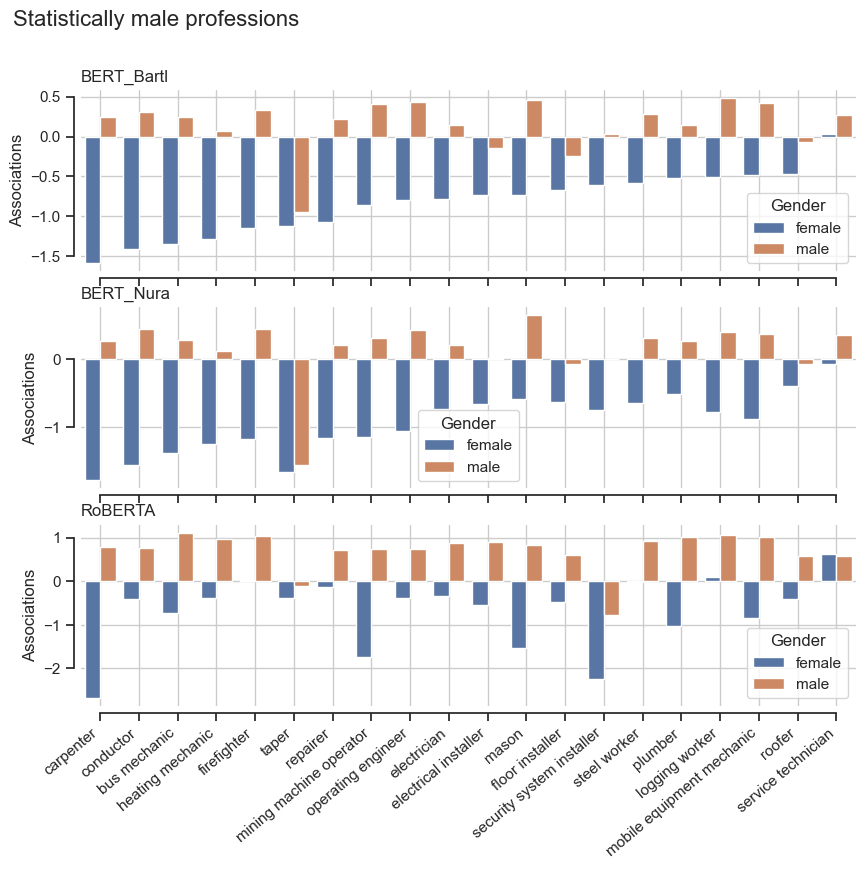

In [27]:
value_col = "Ass_x"
sns.set(style="ticks")

value_cols = ["BERT_Bartl", "BERT_Nura", "RoBERTA"]


for gender in df_merged.Prof_Gender.unique():
    
    
    
    
    # Filter "Gender Professions" and set the plot order
    df = df_merged[df_merged.Prof_Gender == gender]
    order = df[df.Gender == "female"].sort_values(value_cols[0]).Profession
    
    
    # Init Chart Figure
    fig, axs = plt.subplots(3, 1, figsize=(10, 8))
    
    
    # Set barplots => value_cols = ["Ass_x", "Ass_y", "Ass_diff"]
    for i, col in enumerate(value_cols):
        sns.barplot(data=df, x="Profession", y=col, hue="Gender",order=order, ax=axs[i])
    
    # Despine axes
    sns.despine(offset=5, trim=True)
    
    
    # Set axes attributes
    for ax, title in zip(axs, value_cols):
        ax.set(xlabel=None, ylabel="Associations")
        ax.set_xticklabels("")
        ax.set_title(title, loc='left')
        ax.grid()
    

    axs[-1].set_xticklabels(order, rotation=40, ha='right')
    
    
    
    fig.suptitle(f'Statistically {gender} professions', fontsize=16, x=0.20)
    plt.show()
    # print("---" * 35)
    
    
    
    